In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as ex
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<a id = ''></a><br>
## OVERVIEW DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Checking data for precaution missing data**

In [4]:
def print_null(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Total duplicated data: ", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = ['Null Data Count', 'Null Percentage']
    return result
print_null(df)

Total duplicated data:  0


,Null Data Count,Null Percentage
id,0,0.0%
date,0,0.0%
price,0,0.0%
bedrooms,0,0.0%
bathrooms,0,0.0%
sqft_living,0,0.0%
sqft_lot,0,0.0%
floors,0,0.0%
waterfront,0,0.0%
view,0,0.0%


In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<a id = ''></a><br>
## DATA VISUALIZATION

In [6]:
fig = ex.scatter_geo(data_frame=df[df['id'].notnull()], lat='lat', lon='long', scope='usa', template='plotly_dark', title="Overview", hover_data='price', hover_name='id',
                     color='price')
fig.show()

**Dropping unuseful features for ML**

In [7]:
df1 = df.drop(['date', 'id', 'lat', 'long'], axis=1)

In [8]:
df_selected_dtypes = df1.select_dtypes(include=['float64', 'int64'])

**Visualization Skew and Kurtosis with Histogram**

---------------------------------------------
Variable name:  price
Skewness:  4.024069144684712
Kurtosis:  34.58554043194243
---------------------------------------------


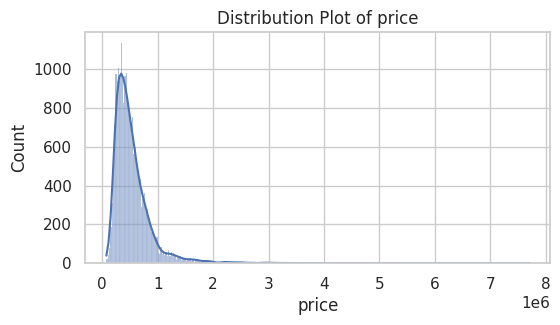

---------------------------------------------
Variable name:  bedrooms
Skewness:  1.97429953543601
Kurtosis:  49.06365318170099
---------------------------------------------


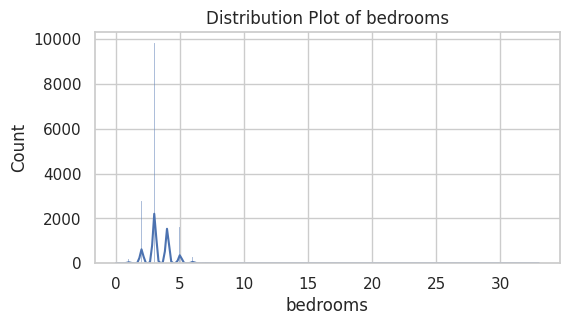

---------------------------------------------
Variable name:  bathrooms
Skewness:  0.5111075733474171
Kurtosis:  1.2799024441754554
---------------------------------------------


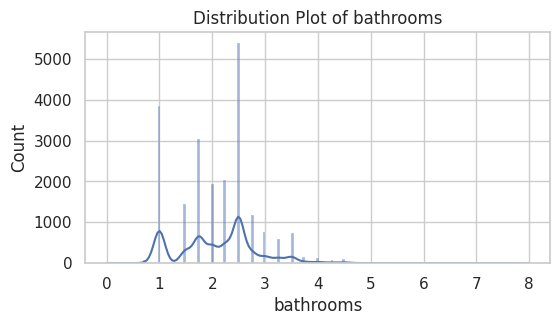

---------------------------------------------
Variable name:  sqft_living
Skewness:  1.471555426802092
Kurtosis:  5.24309298981711
---------------------------------------------


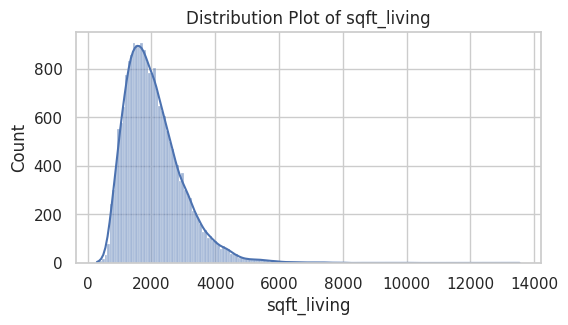

---------------------------------------------
Variable name:  sqft_lot
Skewness:  13.060018959031755
Kurtosis:  285.0778196973658
---------------------------------------------


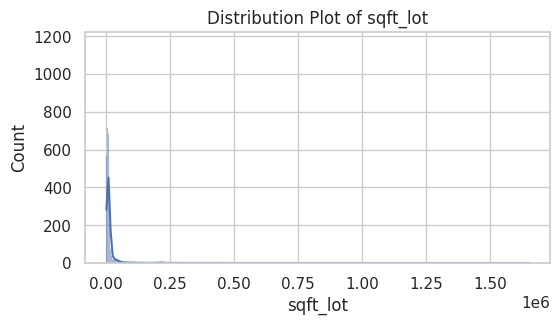

---------------------------------------------
Variable name:  floors
Skewness:  0.616176721157611
Kurtosis:  -0.4847229368298285
---------------------------------------------


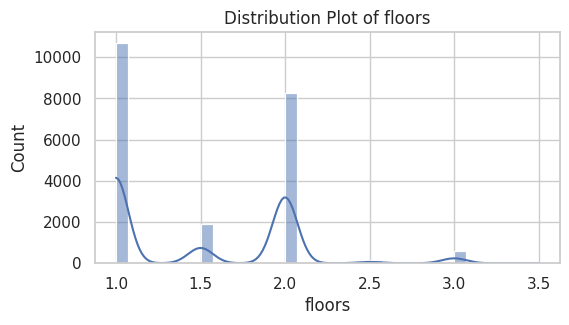

---------------------------------------------
Variable name:  waterfront
Skewness:  11.385107942339081
Kurtosis:  127.63249356537696
---------------------------------------------


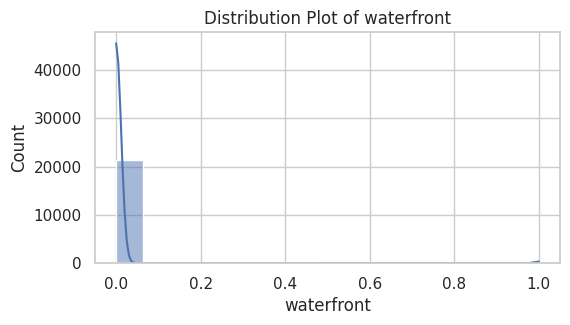

---------------------------------------------
Variable name:  view
Skewness:  3.395749593248714
Kurtosis:  10.893021684601504
---------------------------------------------


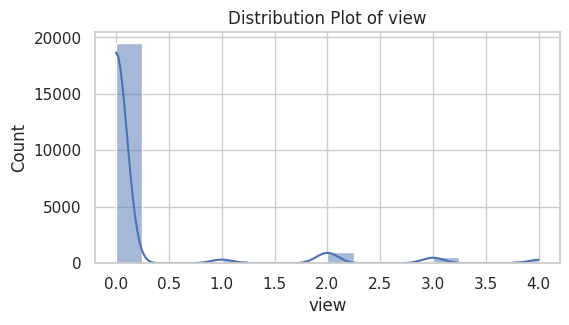

---------------------------------------------
Variable name:  condition
Skewness:  1.0328046374434587
Kurtosis:  0.5257635652845423
---------------------------------------------


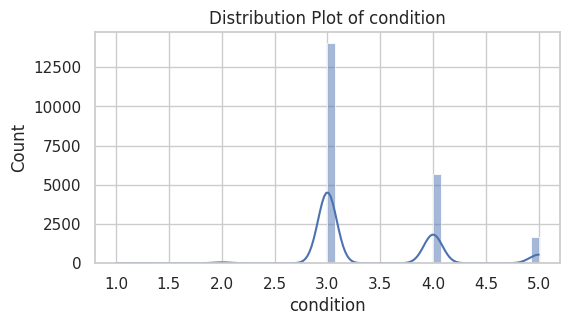

---------------------------------------------
Variable name:  grade
Skewness:  0.7711032007576067
Kurtosis:  1.1909320773987657
---------------------------------------------


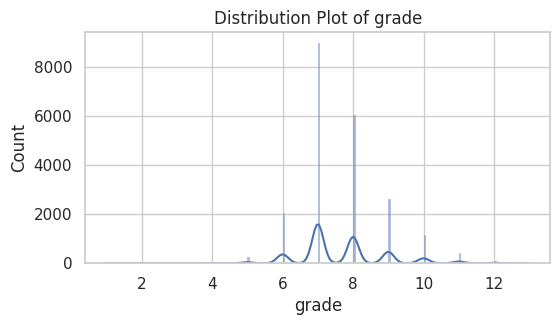

---------------------------------------------
Variable name:  sqft_above
Skewness:  1.4466644733818372
Kurtosis:  3.40230362139787
---------------------------------------------


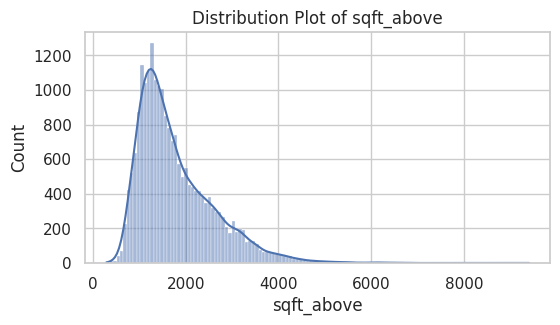

---------------------------------------------
Variable name:  sqft_basement
Skewness:  1.5779650555996247
Kurtosis:  2.7155742114129353
---------------------------------------------


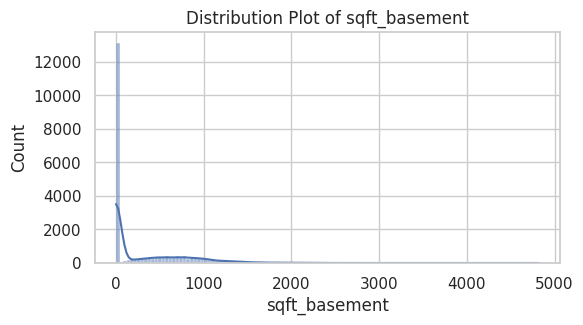

---------------------------------------------
Variable name:  yr_built
Skewness:  -0.46980539881436767
Kurtosis:  -0.657407504733527
---------------------------------------------


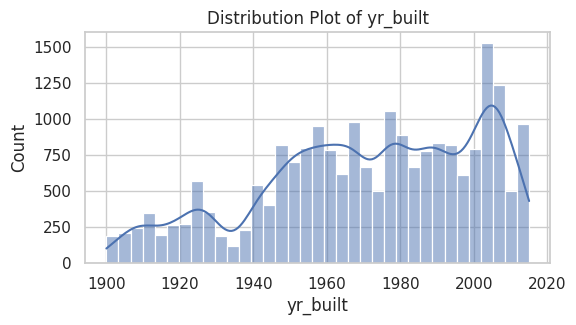

---------------------------------------------
Variable name:  yr_renovated
Skewness:  4.549493366993928
Kurtosis:  18.701152117599058
---------------------------------------------


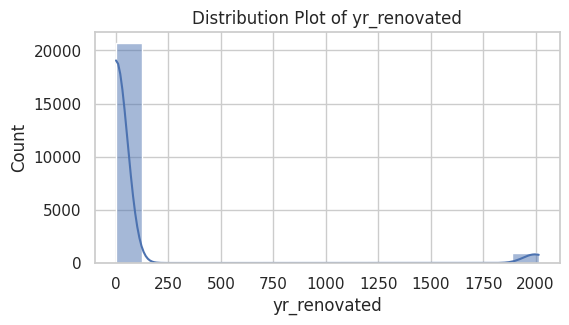

---------------------------------------------
Variable name:  zipcode
Skewness:  0.4056612082396646
Kurtosis:  -0.8534788732101246
---------------------------------------------


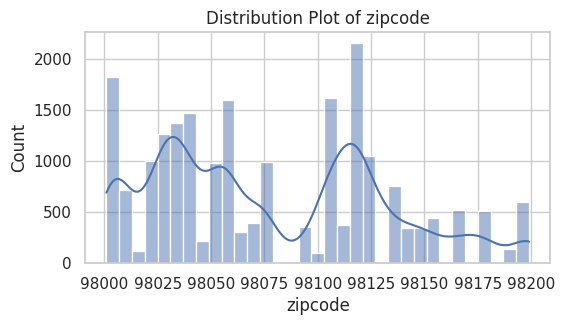

---------------------------------------------
Variable name:  sqft_living15
Skewness:  1.1081812758966967
Kurtosis:  1.5970958104616884
---------------------------------------------


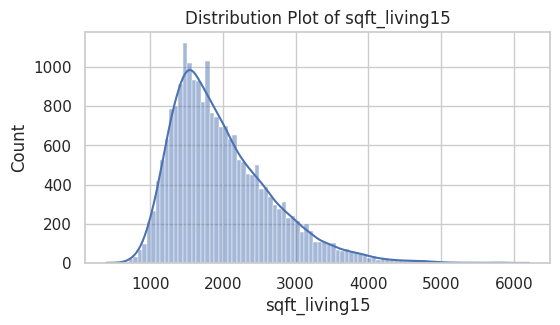

---------------------------------------------
Variable name:  sqft_lot15
Skewness:  9.506743246764398
Kurtosis:  150.76311004626973
---------------------------------------------


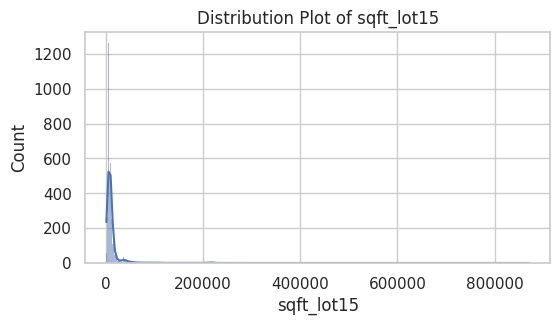

In [9]:
for i in df_selected_dtypes:
    print("---" *15)
    print("Variable name: ", i)
    print("Skewness: ", df[i].skew())
    print("Kurtosis: ", df[i].kurt())
    sns.set(style='whitegrid')
    plt.figure(figsize=(6, 3))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution Plot of {i}')
    print("---" *15)
    plt.show()

<a id = ''></a><br>
## PREPROCESSING AND LOADING MODELS

In [10]:
from collections import Counter

In [11]:
def detect_outliers(data, features):
    outlier_indices = []
    for i in features:
        Q1 = np.percentile(data[i], 25)
        Q3 = np.percentile(data[i], 75)
        
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_columns = data[(data[i] < Q1 - outlier_step) | (data[i] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_columns)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [12]:
df1.drop(detect_outliers(df1, df_selected_dtypes), axis = 0).reset_index(drop = True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19886,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
19887,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
19888,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
19889,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [13]:
X = df1.drop('price', axis=1)
y = df1['price']

**Using StandardScaler to keep values continuous**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
sc.fit(X)
X = sc.fit_transform(X)

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold

In [17]:
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    KNeighborsRegressor(),
    XGBRegressor()
]
r2scores = []
for model in models:
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2scores.append({"Model name": type(model).__name__, "R2 Score": r2})
        print(f"R2 Score with {type(model).__name__}: {r2}")
        print("---" *15)
r2scores = pd.DataFrame(r2scores)
r2scores.sort_values(by="R2 Score", ascending=False)
r2scores

R2 Score with DecisionTreeRegressor: 0.6354633637266123
---------------------------------------------
R2 Score with DecisionTreeRegressor: 0.6143644705843434
---------------------------------------------
R2 Score with DecisionTreeRegressor: 0.5743207451542199
---------------------------------------------
R2 Score with DecisionTreeRegressor: 0.6861258276379241
---------------------------------------------
R2 Score with DecisionTreeRegressor: 0.6239618496148185
---------------------------------------------
R2 Score with RandomForestRegressor: 0.8339169778215407
---------------------------------------------
R2 Score with RandomForestRegressor: 0.8083975141809187
---------------------------------------------
R2 Score with RandomForestRegressor: 0.7996638941432535
---------------------------------------------
R2 Score with RandomForestRegressor: 0.8418374141776802
---------------------------------------------
R2 Score with RandomForestRegressor: 0.8180326728042346
--------------------------

,Model name,R2 Score
0,DecisionTreeRegressor,0.635463
1,DecisionTreeRegressor,0.614364
2,DecisionTreeRegressor,0.574321
3,DecisionTreeRegressor,0.686126
4,DecisionTreeRegressor,0.623962
5,RandomForestRegressor,0.833917
6,RandomForestRegressor,0.808398
7,RandomForestRegressor,0.799664
8,RandomForestRegressor,0.841837
9,RandomForestRegressor,0.818033


**XgbRegressor got highest value in this data also the worst one is DecisionTreeRegressor**

In [18]:
max_value_index = np.argmax(r2scores['R2 Score'])
min_value_index = np.argmin(r2scores['R2 Score'])

max_value = r2scores.iloc[r2scores['R2 Score'].idxmax()]
min_value = r2scores.iloc[r2scores['R2 Score'].idxmin()]

print("Highest score index in list: ", max_value_index)
print("Model with the highest R2 Score: ", max_value['Model name'])
print("R2 Score for the highest model: ", max_value['R2 Score'])
print("---" *11)
print("Lowest score index in list: ", min_value_index)
print("Model with the lowest R2 Score: ", min_value['Model name'])
print("R2 Score for the lowest model: ", min_value['R2 Score'])

Highest score index in list:  20
Model with the highest R2 Score:  XGBRegressor
R2 Score for the highest model:  0.8733855605165135
---------------------------------
Lowest score index in list:  2
Model with the lowest R2 Score:  DecisionTreeRegressor
R2 Score for the lowest model:  0.5743207451542199


<a id = ''></a><br>
## RESIDUALS

**Residual: QQ plot and Residplot**

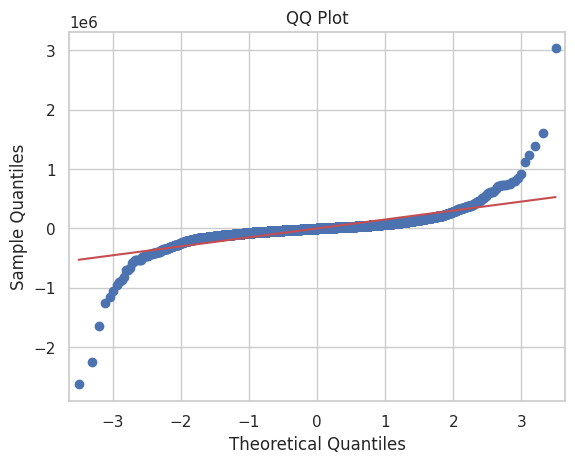

In [19]:
import statsmodels.api as sm

residuals = y_test - y_pred
sm.qqplot(residuals, line='s')
plt.title('QQ Plot')
plt.show()

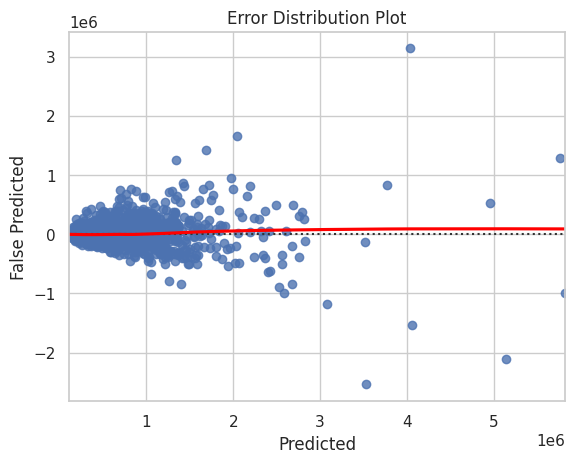

In [20]:
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={"color":"red"})
plt.xlabel("Predicted")
plt.ylabel("False Predicted")
plt.title("Error Distribution Plot")
plt.show()

**Thanks for inspecting the my notebook! Im newbie here. If u have any advices or questions let meet in comments. :)**